In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (
    ModelSpec as MS,
    summarize,
    poly
)

In [3]:
advertising_df = pd.read_csv('Advertising.csv')
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


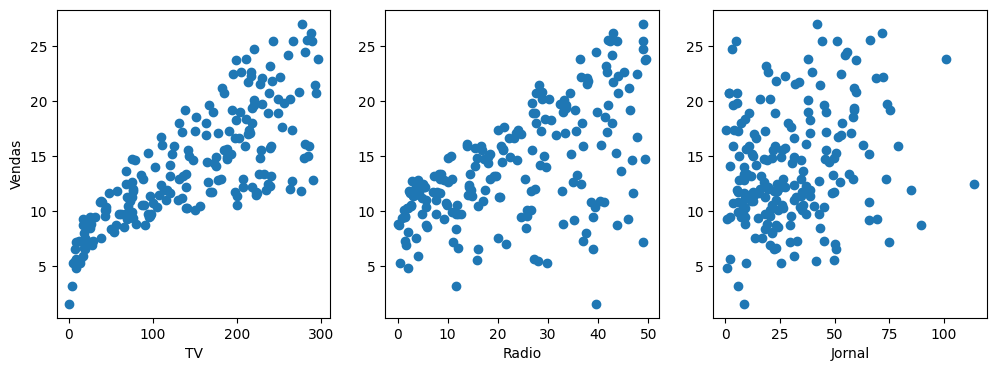

In [4]:
fig , plot = subplots(nrows=1, ncols=3,figsize =(12, 4),)
plot[0].scatter(advertising_df['TV'], advertising_df['sales'], marker='o');
plot[0].set_xlabel("TV");
plot[1].scatter(advertising_df['radio'], advertising_df['sales'], marker='o');
plot[1].set_xlabel("Radio");
plot[2].scatter(advertising_df['newspaper'], advertising_df['sales'], marker='o');
plot[2].set_xlabel("Jornal");
plot[0].set_ylabel("Vendas");

In [6]:
X = pd.DataFrame({'Intercept':np.ones(advertising_df.shape[0]),'TV': advertising_df['TV']})
Y = advertising_df['sales']

In [7]:
model = sm.OLS(Y, X)
result = model.fit()
result.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [8]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


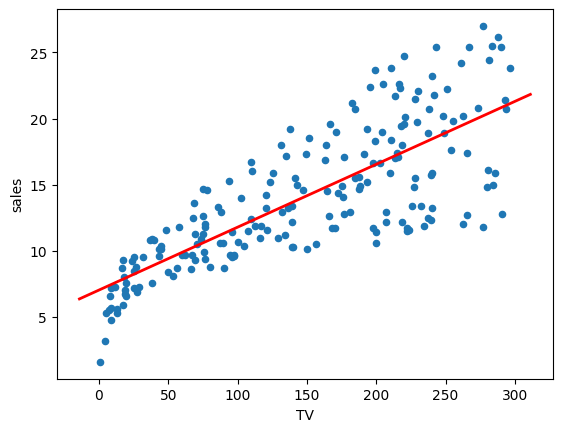

In [18]:
ax = advertising_df.plot.scatter('TV','sales')
abline(ax,
       result.params.iloc[0],
       result.params.iloc[1],
       'r',
       linewidth=2)


In [19]:
summarize(result)

,coef,std err,t,P>|t|
Intercept,7.0326,0.458,15.360,0.0
TV,0.0475,0.003,17.668,0.0
